# Распознавание рукописных символов


# Цель
Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10
категориям (от 0 до 9).

Набор данных содержит 60,000 изображений для обучения и 10,000 изображений для
тестирования.

# Задачи

* Ознакомиться с представлением графических данных
* Ознакомиться с простейшим способом передачи графических данных нейронной
сети
* Создать модель
* Настроить параметры обучения
* Написать функцию, позволяющая загружать изображение пользователи и классифицировать его

# Выполнение работы


### Подключение модулей
Набор данных MNIST уже входит в состав Keras в форме набора из четырех массивов Numpy.

In [1]:
import tensorflow as tf
from numpy import asarray, argmax
from PIL.ImageOps import invert
from PIL.Image import open
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
#from tensorflow.keras.datasets import boston_housing



import matplotlib.pyplot as plt
%matplotlib inline


Здесь train_images и train_labels — это тренировочный набор, то есть данные,
необходимые для обучения. После обучения модель будет проверяться тестовым (или
контрольным) набором, test_images и test_labels. Изображения хранятся в массивах
Numpy, а метки — в массиве цифр от 0 до 9. Изображения и метки находятся в прямом
соответствии, один к одному.

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

print("train_images shape", train_images.shape)
print("train_labels shape",  train_labels.shape)
print("test_images shape", test_images.shape)
print("test_labels shape", test_labels.shape)

train_images shape (60000, 28, 28)
train_labels shape (60000,)
test_images shape (10000, 28, 28)
test_labels shape (10000,)


Для проверки корректности загрузки достаточно сравнить тестовое изображение с его меткой.

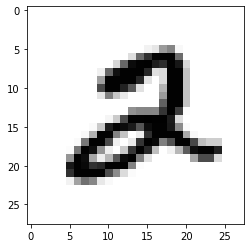

2


In [3]:
plt.imshow(train_images[5],cmap=plt.cm.binary)
plt.show()
print(train_labels[5])

Исходные изображения представлены в виде массивов чисел в интервале [0, 255]. Перед обучением их необходимо преобразовать так, чтобы все значения оказались в интервале [0, 1].

In [4]:

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

Также необходимо закодировать метки категорий. В данном случае прямое кодирование меток заключается в конструировании вектора с нулевыми элементами со значением 1 в элементе, индекс которого соответствует индексу метки.

In [5]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # ВЫравниевание
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
1. функцию потерь, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
2. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
3. метрики для мониторинга на этапах обучения и тестирования — здесь нас будет
интересовать только точность (доля правильно классифицированных
изображений).

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети.

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 10ms/step - loss: 0.3105 - accuracy: 0.9115
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1253 - accuracy: 0.9626
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0875 - accuracy: 0.9738
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0511 - accuracy: 0.9845


Теперь проверим, как модель распознает контрольный набор:

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0720 - accuracy: 0.9770
test_acc: 0.9769999980926514


Попробуем запредиктить нашу картинку

In [10]:
def customNumber():
    img = asarray(invert(open('num.png').convert(mode="L")))
    img = img / 255.0
    img = img.reshape(-1, 28, 28)
    return img
x = customNumber()
a = model.predict(x)
i = 0

for el in a[0]:
    print(f"Вероятность {i} = {round(float(el)*100, 3)}%")
    i += 1

Вероятность 0 = 0.018%
Вероятность 1 = 0.015%
Вероятность 2 = 0.234%
Вероятность 3 = 3.651%
Вероятность 4 = 0.021%
Вероятность 5 = 0.012%
Вероятность 6 = 0.005%
Вероятность 7 = 0.004%
Вероятность 8 = 96.03%
Вероятность 9 = 0.009%


При вводе картинки с цифрой 3 все еще может выдаваться неудовлетворительный результат.
Поэтому попробуем поменять модель обучения. А именно - вместо Sequential() будем использовать Model(). Разницы в обучении нет, но Model можно более точно скорректировать.

In [11]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000, 28,28,1)
test_images = test_images.reshape(10000, 28,28,1)


train_images = train_images.astype('float32') # Flatten data to 1D
test_images = test_images.astype('float32') # Flatten data to 1D

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=300)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
200/200 [==============================] - 13s 41ms/step - loss: 0.0986 - accuracy: 0.9703
Epoch 2/5
200/200 [==============================] - 8s 41ms/step - loss: 0.0274 - accuracy: 0.9920
Epoch 3/5
200/200 [==============================] - 8s 41ms/step - loss: 0.0179 - accuracy: 0.9947
Epoch 4/5
200/200 [==============================] - 8s 41ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0260 - accuracy: 0.9906
test_acc: 0.9905999898910522


In [12]:
def customNumber():
    img = asarray(invert(open('num.png').convert(mode="L")))
    img = img.reshape(-1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    
    return img

x = customNumber()
a = model.predict(x)
i = 0

for el in a[0]:
    print(f"Вероятность {i} = {round(float(el)*100, 3)}%")
    i += 1

Вероятность 0 = 0.0%
Вероятность 1 = 0.0%
Вероятность 2 = 0.0%
Вероятность 3 = 0.231%
Вероятность 4 = 0.0%
Вероятность 5 = 0.0%
Вероятность 6 = 0.0%
Вероятность 7 = 0.0%
Вероятность 8 = 99.768%
Вероятность 9 = 0.001%
